# Исследование объявлений о продаже квартир

---
**Цель проекта:** установить параметры определения рыночной стоимости квартиры на основе имеющихся данных.

---

В качестве исходных данных представлены данные сервиса Яндекс.Недвижимость, архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Данные представлены в двух видах:

    1) Вписанные пользователями вручную
    2) Полученные автоматически на основе картографических данных(расстояние до центра, аэропорта и т.д.)
    
Исходные данные:
data_property - данные о квартирах в Санкт-Петербурге:
    
    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Изучение данных из файла

In [2]:
# data_property = pd.read_csv('/Users/dianamini/Developer/Data/real_estate_data.csv', sep='\t')
# data_property

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

- Пропущенные значения в столбцах balcony, parks_around3000 и ponds_around3000 я заменю на 0 и поменяю тип данных с float на int.
- В столбцах с площадью пропущенные значения я заменю на средние, предварительно разпределив на категории.
- В столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest и days_exposition пропуски я заменю на -1, счтобы легче было потом эти показатели отсеять.
- В столбцах с типом bool пропуски заменю на False, это логично.

## Предобработка данных

In [4]:
data_property.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data_property['balcony'].isna().sum()

11519

In [6]:
data_property['balcony'] = data_property['balcony'].fillna(value=0)
data_property['balcony'].isna().sum()

0

In [7]:
data_property['parks_around3000'].isna().sum()

5518

In [8]:
data_property['parks_around3000'] = data_property['parks_around3000'].fillna(value=0)
data_property['parks_around3000'].isna().sum()

0

In [9]:
data_property['ponds_around3000'].isna().sum()

5518

In [10]:
data_property['ponds_around3000'] = data_property['ponds_around3000'].fillna(value=0)
data_property['ponds_around3000'].isna().sum()

0

In [11]:
data_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- Заменила пропуски на 0 в столбцах balcony, parks_around3000 и ponds_around3000. Появление пропусков данных связано с отсутствием таких параметров в описании квартиры, при заполнении их не указывали, так что логично заменить их на 0.
- В остальных столбцах с пропусками я ничего делать не стала. Если я поставлю 0 вместо пропуска, то данные будут неверные, а если поставлю "-", то поменяется тип данных, что так же меня не устроит.

In [12]:
data_property['is_apartment'].isna().sum()

20924

In [13]:
data_property['is_apartment'] = data_property['is_apartment'].fillna(False)
data_property['is_apartment'].isna().sum()

0

В столбце is_apartment содержится тип данных bool, но так же очень много пропущенных значений(20924). Я зменила пропущенные значения на False, так как апартаментов вообще существует не так уж и много, поэтому я могу спокойно заменять их на False.

In [14]:
data_property['locality_name'].isna().sum()

49

In [15]:
data_property = data_property.dropna(subset=['locality_name'])
data_property['locality_name'].isna().sum()

0

In [16]:
data_property = data_property.dropna(subset=['floors_total'])
data_property['floors_total'].isna().sum()

0

В столбцах locality_name и floors_total было 49 и 85 пропущенных значений. Я их удалила, так как это не такая большая сумма и на результаты она не повлияет. Как-то вычислить среднее значение в столбце floors_total мне не представляется возможным.

In [17]:
data_property['total_area'].min()

12.0

In [18]:
data_property['total_area'].max()

900.0

In [19]:
def total_area_group(area):
    if area <= 50:
        return 'до 50м2'
    if area <= 150:
        return 'от 50м2 до 150м2'
    if area <= 350:
        return 'от 150м2 до 350м2'
    if area <= 500:
        return 'от 350м2 до 500м2'
    return 'больше 500м2'
data_property['total_area_group'] = data_property['total_area'].apply(total_area_group)
data_property

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,от 50м2 до 150м2
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,до 50м2
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,от 50м2 до 150м2
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,от 150м2 до 350м2
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,от 50м2 до 150м2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,от 50м2 до 150м2
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,...,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,от 50м2 до 150м2
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,...,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,от 50м2 до 150м2
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,от 50м2 до 150м2


In [20]:
mean_area = data_property.pivot_table(index='total_area_group', values=['living_area', 'kitchen_area'], aggfunc='mean')
mean_area

,kitchen_area,living_area
total_area_group,,
больше 500м2,61.285714,338.750000
до 50м2,8.539581,20.897155
от 150м2 до 350м2,24.772835,117.863677
от 350м2 до 500м2,35.170000,226.269565
от 50м2 до 150м2,11.713019,43.143141


In [21]:
import math
def fillna_kitchen_living_area(row):
    if math.isnan(row['kitchen_area']):
        value = mean_area.loc[mean_area.index == row['total_area_group']]['kitchen_area'][0]
        row['kitchen_area'] = value
    if math.isnan(row['living_area']):
        value = mean_area.loc[mean_area.index == row['total_area_group']]['living_area'][0]
        row['living_area'] = value
    return row
    
data_property = data_property.apply(fillna_kitchen_living_area, axis=1)

Для заполнения пропусков в столбцах kitchen_area и living_area:
- категоризировала квартиры по общей площади
- для каждой категории вывела среднее значение жилой площади и площади кухни
- подставила соответствующие значения вместо отсутстсвующих

In [22]:
data_property['airports_nearest'] = data_property['airports_nearest'].fillna(value = -1)

In [23]:
data_property['cityCenters_nearest'] = data_property['cityCenters_nearest'].fillna(value = -1)

In [24]:
data_property['parks_nearest'] = data_property['cityCenters_nearest'].fillna(value = -1)

In [25]:
data_property['ponds_nearest'] = data_property['cityCenters_nearest'].fillna(value = -1)

In [26]:
data_property['days_exposition'] = data_property['days_exposition'].fillna(value = -1)

В стоолбцах выше поменяла несуществующие значения на -1, чтоб легко можно было отсеить эти значения потом.

In [27]:
data_property['balcony'] = data_property['balcony'].astype(int)
data_property['parks_around3000'] = data_property['parks_around3000'].astype(int)
data_property['ponds_around3000'] = data_property['ponds_around3000'].astype(int)
data_property['last_price'] = data_property['last_price'].astype(int)
data_property['floors_total'] = data_property['floors_total'].astype(int)
data_property['airports_nearest'] = data_property['airports_nearest'].astype(int)
data_property['cityCenters_nearest'] = data_property['cityCenters_nearest'].astype(int)
data_property['parks_nearest'] = data_property['parks_nearest'].astype(int)
data_property['ponds_nearest'] = data_property['ponds_nearest'].astype(int)
data_property['days_exposition'] = data_property['days_exposition'].astype(int)

In [28]:
data_property['first_day_exposition'] = pd.to_datetime(data_property['first_day_exposition'])

 - Поменяла типы данных в столбцах, где цифры после запятой не имеют особого значения для анализа
 - в столбце first_day_exposition поменяла тип с object на datetime

In [29]:
data_property.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9084
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
total_area_group           0
dtype: int64

In [30]:
data_property.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0,Санкт-Петербург,18863,16028,1,16028,2,16028,-1,от 50м2 до 150м2
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,2,посёлок Шушары,12817,18603,0,18603,0,18603,81,до 50м2
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,0,Санкт-Петербург,21741,13933,1,13933,2,13933,558,от 50м2 до 150м2
3,0,64900000,159.0,2015-07-24,3,NaN,14,117.863677,9,False,...,0,Санкт-Петербург,28098,6800,2,6800,3,6800,424,от 150м2 до 350м2
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,31856,8098,2,8098,1,8098,121,от 50м2 до 150м2


## Расчёты и добавление результатов в таблицу

In [31]:
data_property['meter_prise'] = data_property['last_price'] / data_property['total_area']
data_property.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group,meter_prise
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,Санкт-Петербург,18863,16028,1,16028,2,16028,-1,от 50м2 до 150м2,120370.370370
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,посёлок Шушары,12817,18603,0,18603,0,18603,81,до 50м2,82920.792079
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,Санкт-Петербург,21741,13933,1,13933,2,13933,558,от 50м2 до 150м2,92785.714286
3,0,64900000,159.0,2015-07-24,3,NaN,14,117.863677,9,False,...,Санкт-Петербург,28098,6800,2,6800,3,6800,424,от 150м2 до 350м2,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,Санкт-Петербург,31856,8098,2,8098,1,8098,121,от 50м2 до 150м2,100000.000000


In [32]:
data_property['total_living_ratio'] = data_property['total_area'] / data_property['living_area'] * 100
data_property['kitchen_living_ratio'] = data_property['living_area'] / data_property['kitchen_area'] * 100
data_property.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group,meter_prise,total_living_ratio,kitchen_living_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028,1,16028,2,16028,-1,от 50м2 до 150м2,120370.370370,211.764706,204.000000
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,18603,0,18603,0,18603,81,до 50м2,82920.792079,217.204301,169.090909
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,13933,1,13933,2,13933,558,от 50м2 до 150м2,92785.714286,163.265306,413.253012
3,0,64900000,159.0,2015-07-24,3,NaN,14,117.863677,9,False,...,6800,2,6800,3,6800,424,от 150м2 до 350м2,408176.100629,134.901611,475.777904
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8098,2,8098,1,8098,121,от 50м2 до 150м2,100000.000000,312.500000,78.048780


In [33]:
def floor_category(row):
 
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
 
data_property['floor_category'] = data_property.apply(floor_category, axis = 1)
data_property.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group,meter_prise,total_living_ratio,kitchen_living_ratio,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1,16028,2,16028,-1,от 50м2 до 150м2,120370.370370,211.764706,204.000000,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0,18603,0,18603,81,до 50м2,82920.792079,217.204301,169.090909,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,1,13933,2,13933,558,от 50м2 до 150м2,92785.714286,163.265306,413.253012,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14,117.863677,9,False,...,2,6800,3,6800,424,от 150м2 до 350м2,408176.100629,134.901611,475.777904,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2,8098,1,8098,121,от 50м2 до 150м2,100000.000000,312.500000,78.048780,другой


In [34]:
data_property['weekday'] = data_property['first_day_exposition'].dt.weekday
data_property['year'] = data_property['first_day_exposition'].dt.year
data_property['month'] = data_property['first_day_exposition'].dt.month
data_property.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_group,meter_prise,total_living_ratio,kitchen_living_ratio,floor_category,weekday,year,month
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028,-1,от 50м2 до 150м2,120370.370370,211.764706,204.000000,другой,3,2019,3
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,18603,81,до 50м2,82920.792079,217.204301,169.090909,первый,1,2018,12
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,13933,558,от 50м2 до 150м2,92785.714286,163.265306,413.253012,другой,3,2015,8
3,0,64900000,159.0,2015-07-24,3,NaN,14,117.863677,9,False,...,6800,424,от 150м2 до 350м2,408176.100629,134.901611,475.777904,другой,4,2015,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8098,121,от 50м2 до 150м2,100000.000000,312.500000,78.048780,другой,1,2018,6


In [35]:
def ceiling_category(row):
    if row['ceiling_height'] <= 3:
        return 'до 3х метров'
    return 'выше 3х метров'

data_property['ceiling_category'] = data_property.apply(ceiling_category, axis = 1)
data_property.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_group,meter_prise,total_living_ratio,kitchen_living_ratio,floor_category,weekday,year,month,ceiling_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,-1,от 50м2 до 150м2,120370.370370,211.764706,204.000000,другой,3,2019,3,до 3х метров
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,81,до 50м2,82920.792079,217.204301,169.090909,первый,1,2018,12,выше 3х метров
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,558,от 50м2 до 150м2,92785.714286,163.265306,413.253012,другой,3,2015,8,выше 3х метров
3,0,64900000,159.0,2015-07-24,3,NaN,14,117.863677,9,False,...,424,от 150м2 до 350м2,408176.100629,134.901611,475.777904,другой,4,2015,7,выше 3х метров
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,121,от 50м2 до 150м2,100000.000000,312.500000,78.048780,другой,1,2018,6,выше 3х метров


In [36]:
data_property['floors_total'].max()

60

In [37]:
def floors_total_category(row):
    if row['floors_total'] <= 5:
        return 'малоэтажный'
    if row['floors_total'] <= 20:
        return 'средней этажности'
    if row['floors_total'] <= 40:
        return 'многоэтажный'
    return 'больше 40 этажей'

data_property['floors_total_category'] = data_property.apply(floors_total_category, axis = 1)
data_property

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_area_group,meter_prise,total_living_ratio,kitchen_living_ratio,floor_category,weekday,year,month,ceiling_category,floors_total_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,от 50м2 до 150м2,120370.370370,211.764706,204.000000,другой,3,2019,3,до 3х метров,средней этажности
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.600000,1,False,...,до 50м2,82920.792079,217.204301,169.090909,первый,1,2018,12,выше 3х метров,средней этажности
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.300000,4,False,...,от 50м2 до 150м2,92785.714286,163.265306,413.253012,другой,3,2015,8,выше 3х метров,малоэтажный
3,0,64900000,159.00,2015-07-24,3,NaN,14,117.863677,9,False,...,от 150м2 до 350м2,408176.100629,134.901611,475.777904,другой,4,2015,7,выше 3х метров,средней этажности
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,от 50м2 до 150м2,100000.000000,312.500000,78.048780,другой,1,2018,6,выше 3х метров,средней этажности
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,False,...,от 50м2 до 150м2,72490.845228,182.551160,530.007231,другой,1,2017,3,выше 3х метров,малоэтажный
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.000000,4,False,...,от 50м2 до 150м2,52542.372881,155.263158,447.058824,другой,0,2018,1,выше 3х метров,малоэтажный
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.700000,1,False,...,от 50м2 до 150м2,44091.710758,190.909091,253.564003,первый,6,2018,2,выше 3х метров,малоэтажный
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.143141,12,False,...,от 50м2 до 150м2,149511.400651,177.896179,185.163697,другой,1,2017,3,до 3х метров,средней этажности


- Добавила необходимые расчеты и категории в таблицу.

## Исследовательский анализ данных

### Удаляю выбивающиеся значения

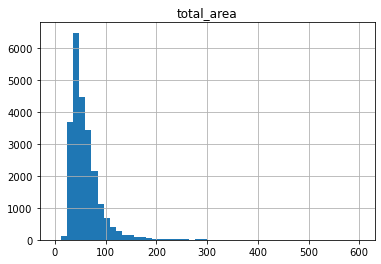

In [38]:
data_property.hist('total_area', bins=50, range = (0, 600))
plt.show()

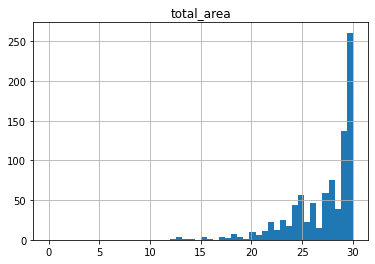

In [39]:
data_property.hist('total_area', bins=50, range = (0, 30))
plt.show()

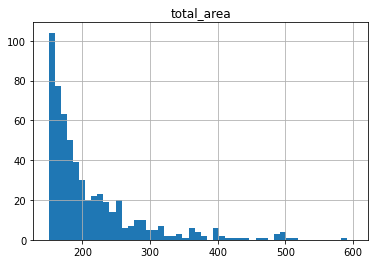

In [40]:
data_property.hist('total_area', bins=50, range = (150, 600))
plt.show()

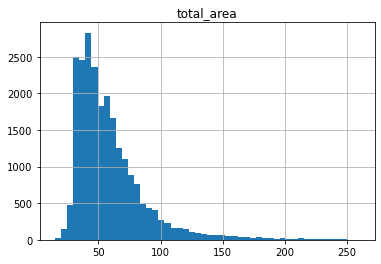

In [41]:
data_property = data_property.query('total_area >= 15 and total_area <=250')
data_property.hist('total_area', bins=50, range = (15, 260))
plt.show()

- В столбце total_area я вижу слишком маленькие и слишком большие площади квартир. Они мне показались лишними, поэтому я оставила диапазон общих площадей от 15м2 до 250м2.

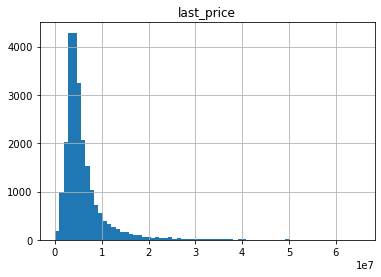

In [42]:
data_property.hist('last_price', bins=70, range = (0, 65000000))
plt.show()

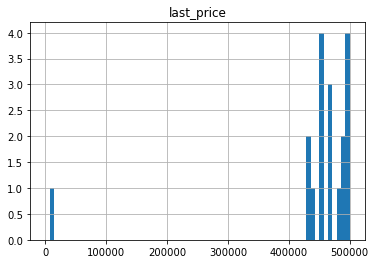

In [43]:
data_property.hist('last_price', bins=70, range = (0, 500000))
plt.show()

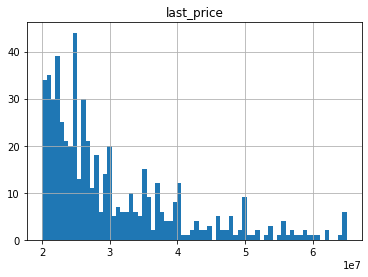

In [44]:
data_property.hist('last_price', bins=70, range = (20000000, 65000000))
plt.show()

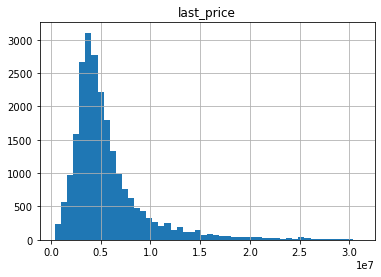

In [45]:
data_property = data_property.query('last_price >= 450000 and last_price <=30000000')
data_property.hist('last_price', bins=50, range = (400000, 31000000))
plt.show()

- В столбце с ценами были и нулевые значения и аномально большие. Я отбросила лишнее и оставила данные в диапазоне от 450 тысяч до 30 миллионов.

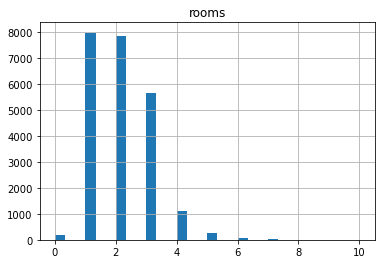

In [46]:
data_property.hist('rooms', bins=30, range = (0, 10))
plt.show()

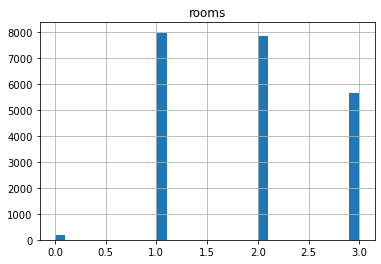

In [47]:
data_property.hist('rooms', bins=30, range = (0, 3))
plt.show()

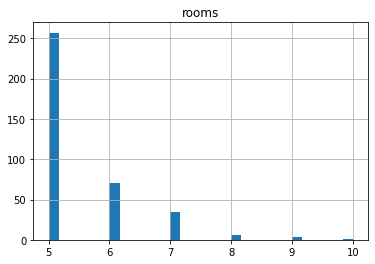

In [48]:
data_property.hist('rooms', bins=30, range = (5, 10))
plt.show()

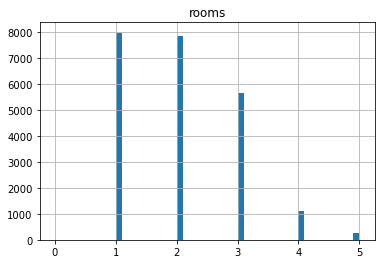

In [49]:
data_property = data_property.query('rooms >= 1 and rooms <=5')
data_property.hist('rooms', bins=50, range = (0, 5))
plt.show()

- Отбросила квартиры с 0 комнат и квартиры имеющие 6 и более комнат.

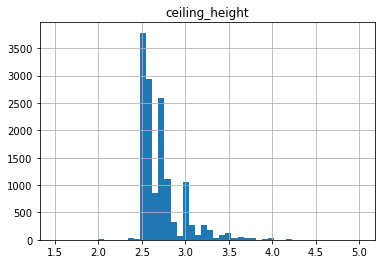

In [50]:
data_property.hist('ceiling_height', bins=50, range = (1.5 , 5))
plt.show()

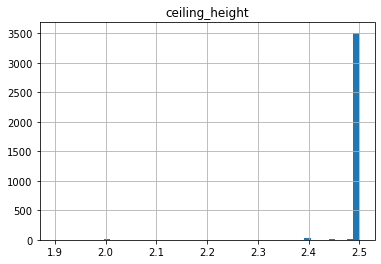

In [51]:
data_property.hist('ceiling_height', bins=50, range = (1.9 , 2.5))
plt.show()

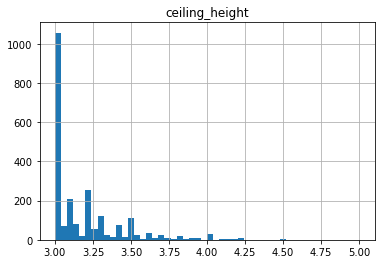

In [52]:
data_property.hist('ceiling_height', bins=50, range = (3 , 5))
plt.show()

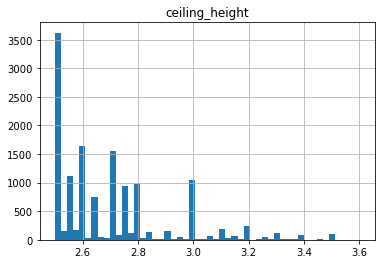

In [53]:
data_property = data_property.query('ceiling_height >= 2.5 and ceiling_height <=3.5')
data_property.hist('ceiling_height', bins=50, range = (2.5, 3.6))
plt.show()

- В высоте потолков были указаны и потолки меньше 2 метров, что не может быть правдой, так что эти значения я отсеила. Самым большим значением оставила 3,5 метра, так как включать в анализ потолки выше не имеет смысла.

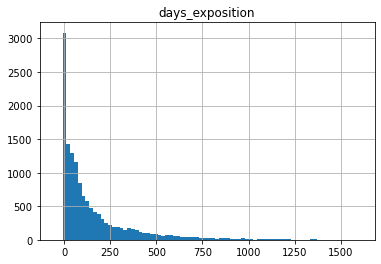

In [54]:
data_property.hist('days_exposition', bins=80, range = (-50, 1600))
plt.show()

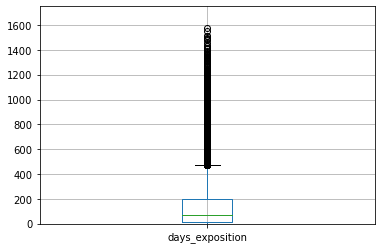

In [55]:
plt.ylim(-2, 1750)
data_property.boxplot('days_exposition')
plt.show()

In [56]:
data_property['days_exposition'].describe()

count    13773.000000
mean       156.303492
std        218.090492
min         -1.000000
25%         17.000000
50%         71.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

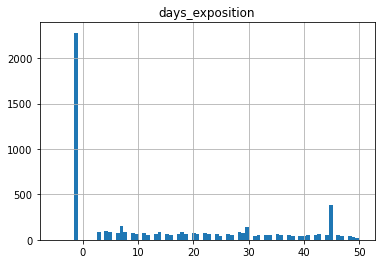

In [57]:
data_property.hist('days_exposition', bins=80, range = (-5, 50))
plt.show()

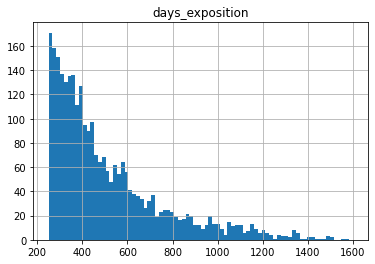

In [58]:
data_property.hist('days_exposition', bins=80, range = (250, 1600))
plt.show()

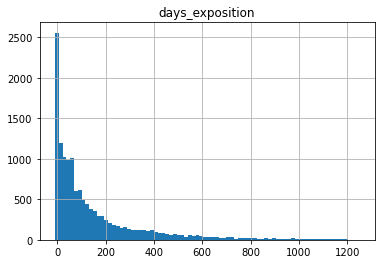

In [59]:
data_property = data_property.query('days_exposition >= -1 and days_exposition <=1200')
data_property.hist('days_exposition', bins=80, range = (-10, 1250))
plt.show()

- В total_exposition изначально пропущенные значения были заменены мной на -1, так что я их отсеяла. Так же отсеяла показатели выше 1200.
- Есть продажи, которые длятся 1 день и я не думаю, что они слишком короткие. А вот продажи которые длятся около 5 лет это слишком много, но я допускаю связь длительности продажи с особенностями объекта.

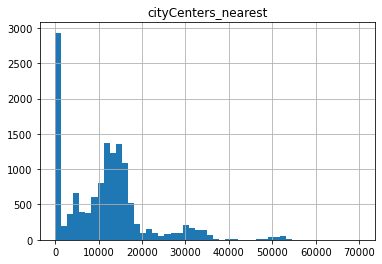

In [60]:
data_property.hist('cityCenters_nearest', bins=50, range = (-50, 70000))
plt.show()

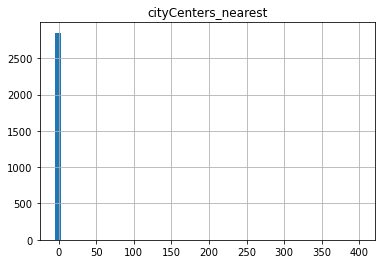

In [61]:
data_property.hist('cityCenters_nearest', bins=50, range = (-5, 400))
plt.show()

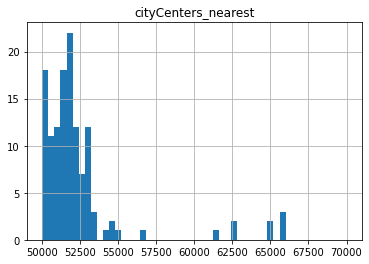

In [62]:
data_property.hist('cityCenters_nearest', bins=50, range = (50000, 70000))
plt.show()

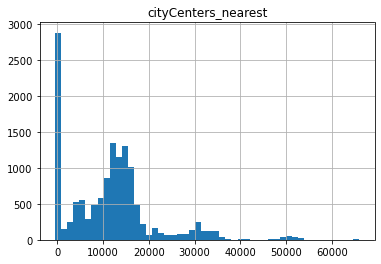

In [63]:
data_property = data_property.query('cityCenters_nearest >= -1 and cityCenters_nearest <=66000')
data_property.hist('cityCenters_nearest', bins=50, range = (-500, 66000))
plt.show()

- Убрала выбивающиеся значения из cityCenters_nearest

# Зависимость цены от площади, количества комнат, удаленности от центра.

In [64]:
data_property['last_price'].corr(data_property['total_area'])

0.7839478150555464

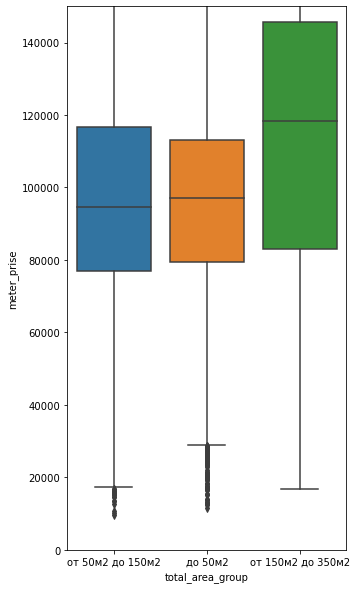

In [65]:
plt.figure(figsize = (5,10))
ax = sns.boxplot(x='total_area_group', y='meter_prise', data=data_property)
ax.set_ylim([0,150000])
plt.show()

- Квартиры с самой низкой ценой за квадратный метр находятся в категории "от 50м2 до 150м2"

In [66]:
data_property['last_price'].corr(data_property['rooms'])

0.4809747800506051

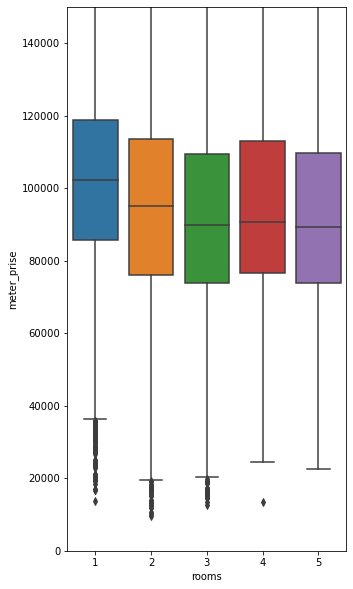

In [67]:
plt.figure(figsize = (5,10))
ax = sns.boxplot(x='rooms', y='meter_prise', data=data_property)
ax.set_ylim([0,150000])
plt.show()

- В подтверждение предыдущей диаграммы: самые высокие цены за квадратный метр имеют однокомнатные квартиры.

In [68]:
data_property.query('cityCenters_nearest > 0')[['cityCenters_nearest', 'last_price']].corr()

,cityCenters_nearest,last_price
cityCenters_nearest,1.00000,-0.32825
last_price,-0.32825,1.00000


- Чем дальше от центра, тем ниже цена

# Зависимость цены от этажа

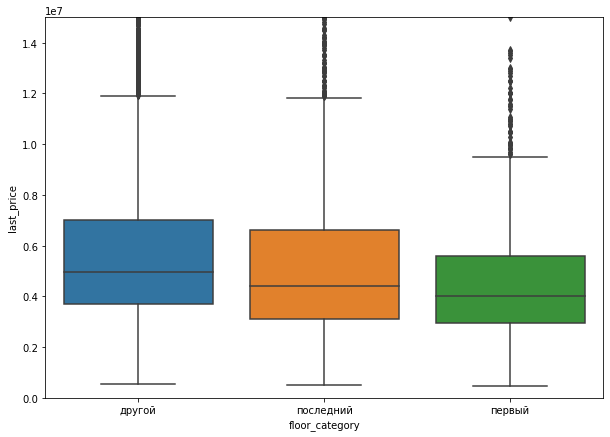

In [69]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(x='floor_category', y='last_price', data=data_property)
ax.set_ylim([0,15000000])
plt.show()

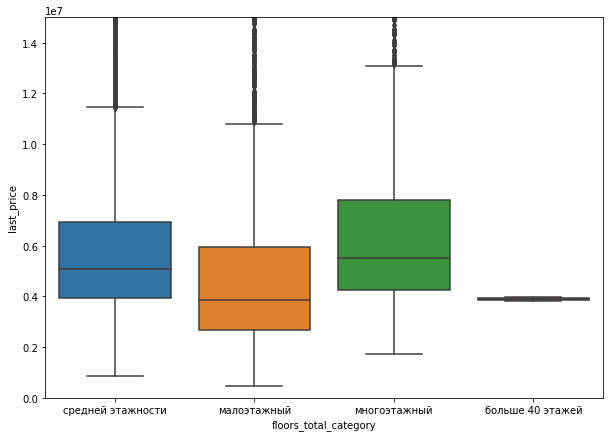

In [70]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(x='floors_total_category', y='last_price', data=data_property)
ax.set_ylim([0,15000000])
plt.show()

- Первый и последние этажи снижают цену квартиры. При этом квартиры на первом этаже дешевле квартир на последнем.

# Зависимость цены от даты размещения

# День недели

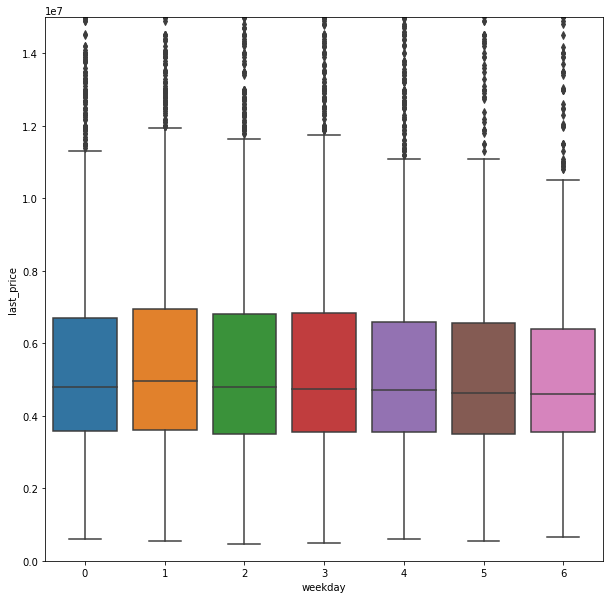

In [71]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x='weekday', y='last_price', data=data_property)
ax.set_ylim([0,15000000])
plt.show()

- Не вижу особой связи между днем недели и ценой квартиры

# Месяц

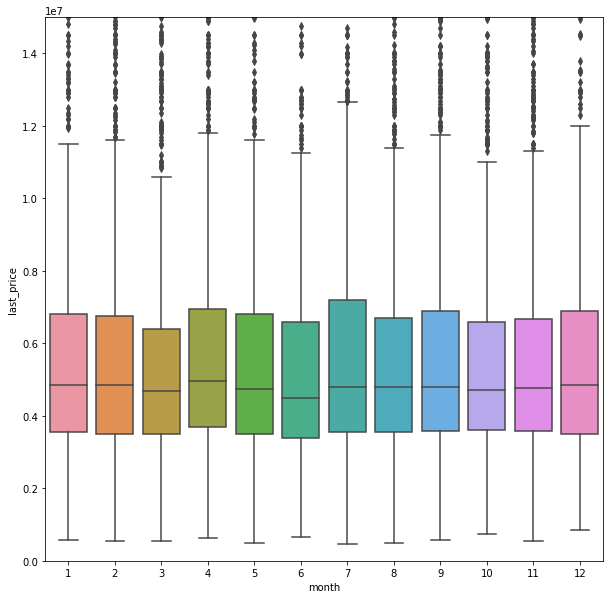

In [72]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x='month', y='last_price', data=data_property)
ax.set_ylim([0,15000000])
plt.show()

- Наблюдается повышение средней цены в апреле, сентябре и декабре. 
- Я точно могу объяснить сентябрьское повышение цены: это связано с началом учебного года, родители стремятся купит квартиру для поступившего в университет ребенка

# Год

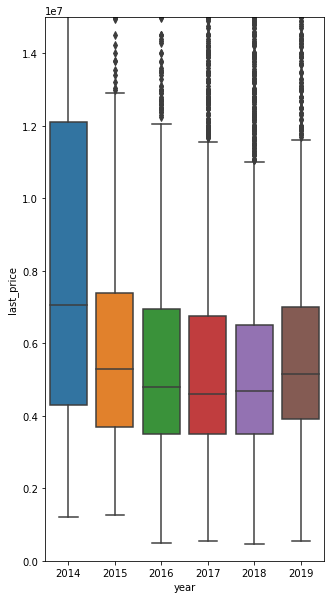

In [73]:
plt.figure(figsize = (5,10))
ax = sns.boxplot(x='year', y='last_price', data=data_property)
ax.set_ylim([0,15000000])
plt.show()

- Спад цен на недвижимость с 2014 по 2017.
- Самые низкие цены на квартиры были в 2017 году. 

# Зависимость цены за м2 от населенного пункта

In [74]:
locality_name = data_property.groupby('locality_name').size().sort_values(ascending=False)
locality_name_ten = locality_name.head(10)
locality_name_ten.index

Index(['Санкт-Петербург', 'Всеволожск', 'Пушкин', 'посёлок Шушары', 'Колпино',
       'посёлок Мурино', 'Гатчина', 'Петергоф', 'посёлок Парголово',
       'Сестрорецк'],
      dtype='object', name='locality_name')

In [75]:
meter_price_pivot = data_property.pivot_table(index='locality_name', values='meter_prise')
meter_price_pivot

,meter_prise
locality_name,
Бокситогорск,19230.769231
Волосово,40208.886370
Волхов,35269.615426
Всеволожск,67194.752264
Выборг,59288.455236
...,...
садовое товарищество Рахья,37777.777778
село Копорье,40138.792872
село Павлово,62832.434854


In [76]:
meter_price_pivot__ = meter_price_pivot[meter_price_pivot.index.isin(locality_name_ten.index)].sort_values(by='meter_prise', ascending = False)
meter_price_pivot__

,meter_prise
locality_name,
Санкт-Петербург,111069.294953
Пушкин,103367.970850
Сестрорецк,102048.625094
посёлок Парголово,90807.618060
посёлок Мурино,87310.007093
Петергоф,85519.516924
посёлок Шушары,79201.854691
Колпино,75973.424752
Гатчина,70144.986616


In [77]:
print('Самая высокая цена за квадратный метр в городе', meter_price_pivot__.index[0], ':', meter_price_pivot__['meter_prise'][0])
print('Самая низкая цена за квадратный метр в городе', meter_price_pivot__.index[9], ':', meter_price_pivot__['meter_prise'][9])


Самая высокая цена за квадратный метр в городе Санкт-Петербург : 111069.29495339358
Самая низкая цена за квадратный метр в городе Всеволожск : 67194.7522642077


# Квартиры в центре Санкт-Петербурга

In [78]:
spb_center = data_property.loc[data_property['locality_name'] == 'Санкт-Петербург']
spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_area_group,meter_prise,total_living_ratio,kitchen_living_ratio,floor_category,weekday,year,month,ceiling_category,floors_total_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,от 50м2 до 150м2,120370.370370,211.764706,204.000000,другой,3,2019,3,до 3х метров,средней этажности
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,от 50м2 до 150м2,100000.000000,312.500000,78.048780,другой,1,2018,6,выше 3х метров,средней этажности
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,от 50м2 до 150м2,88524.590164,139.908257,670.769231,другой,6,2017,2,до 3х метров,средней этажности
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,до 50м2,127525.252525,195.073892,238.823529,другой,3,2017,11,до 3х метров,средней этажности
16,11,6700000,82.00,2017-11-23,3,3.05,5,55.600000,1,False,...,от 50м2 до 150м2,81707.317073,147.482014,617.777778,первый,3,2017,11,выше 3х метров,малоэтажный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000,31.00,2017-04-29,1,2.55,9,18.000000,6,False,...,до 50м2,106451.612903,172.222222,276.923077,другой,5,2017,4,до 3х метров,средней этажности
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.000000,12,False,...,от 50м2 до 150м2,91089.108911,160.317460,420.000000,другой,0,2019,4,выше 3х метров,средней этажности
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.300000,4,False,...,до 50м2,100566.572238,216.564417,179.120879,другой,2,2018,2,до 3х метров,средней этажности
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.300000,7,False,...,от 50м2 до 150м2,129903.978052,180.893300,380.188679,другой,3,2016,10,до 3х метров,многоэтажный


In [79]:
spb_center['km_cityCenters_nearest'] = spb_center['cityCenters_nearest'] / 1000
spb_center['km_cityCenters_nearest'] = spb_center['km_cityCenters_nearest'].astype(int)
spb_center

/var/folders/vx/vjxdxpfx19j6k3fggtp493v00000gq/T/ipykernel_12977/2508090959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_center['km_cityCenters_nearest'] = spb_center['cityCenters_nearest'] / 1000
/var/folders/vx/vjxdxpfx19j6k3fggtp493v00000gq/T/ipykernel_12977/2508090959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_center['km_cityCenters_nearest'] = spb_center['km_cityCenters_nearest'].astype(int)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,meter_prise,total_living_ratio,kitchen_living_ratio,floor_category,weekday,year,month,ceiling_category,floors_total_category,km_cityCenters_nearest
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,120370.370370,211.764706,204.000000,другой,3,2019,3,до 3х метров,средней этажности,16
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,100000.000000,312.500000,78.048780,другой,1,2018,6,выше 3х метров,средней этажности,8
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,88524.590164,139.908257,670.769231,другой,6,2017,2,до 3х метров,средней этажности,15
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,127525.252525,195.073892,238.823529,другой,3,2017,11,до 3х метров,средней этажности,13
16,11,6700000,82.00,2017-11-23,3,3.05,5,55.600000,1,False,...,81707.317073,147.482014,617.777778,первый,3,2017,11,выше 3х метров,малоэтажный,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000,31.00,2017-04-29,1,2.55,9,18.000000,6,False,...,106451.612903,172.222222,276.923077,другой,5,2017,4,до 3х метров,средней этажности,11
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.000000,12,False,...,91089.108911,160.317460,420.000000,другой,0,2019,4,выше 3х метров,средней этажности,14
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.300000,4,False,...,100566.572238,216.564417,179.120879,другой,2,2018,2,до 3х метров,средней этажности,16
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.300000,7,False,...,129903.978052,180.893300,380.188679,другой,3,2016,10,до 3х метров,многоэтажный,4


In [80]:
spb_center_pivot = spb_center.pivot_table(index='km_cityCenters_nearest', values='meter_prise')
spb_center_pivot

,meter_prise
km_cityCenters_nearest,
0,128793.999540
1,141510.328879
2,121539.187664
3,120931.242612
4,131696.317523
5,133843.133011
6,128463.882409
7,126425.812856
8,122597.406595


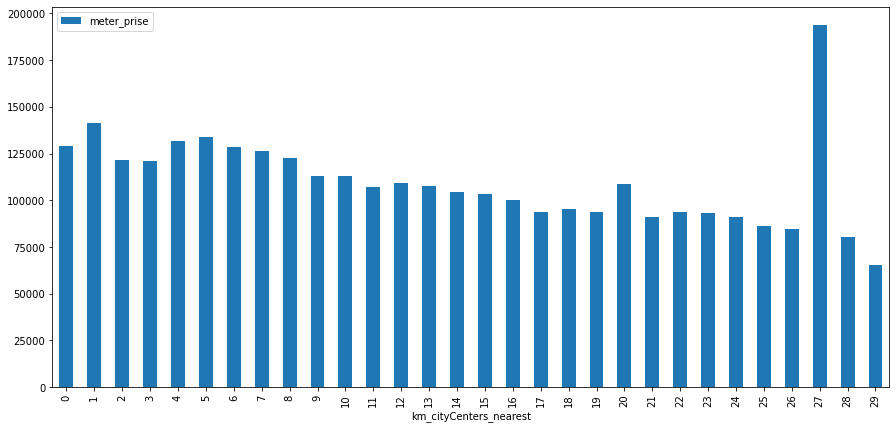

In [81]:
spb_center_pivot.plot(kind = 'bar',figsize = (15,7))
plt.show()

- Все квартиры, находящиеся от центра на расстоянии до 7 километров, можно считать квартирами в центре города. 

# Показатели по центру города и по всему городу в целом

In [82]:
spb_center_pivot_seven = spb_center.query('km_cityCenters_nearest <= 7')
spb_center_pivot_seven

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,meter_prise,total_living_ratio,kitchen_living_ratio,floor_category,weekday,year,month,ceiling_category,floors_total_category,km_cityCenters_nearest
63,2,20000000,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,169491.525424,173.529412,425.000000,другой,1,2018,9,до 3х метров,средней этажности,4
94,3,3500000,29.5,2019-04-26,1,2.50,5,15.6,2,False,...,118644.067797,189.102564,283.636364,другой,4,2019,4,до 3х метров,малоэтажный,7
106,9,10500000,124.1,2017-05-25,5,3.20,4,79.4,3,False,...,84609.186140,156.297229,397.000000,другой,3,2017,5,выше 3х метров,малоэтажный,5
114,5,4000000,21.4,2019-02-07,1,2.90,8,8.3,7,False,...,186915.887850,257.831325,131.746032,другой,3,2019,2,до 3х метров,средней этажности,5
136,16,6500000,51.8,2018-08-01,2,3.45,6,25.6,2,False,...,125482.625483,202.343750,350.684932,другой,2,2018,8,выше 3х метров,средней этажности,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23644,7,4990000,62.5,2018-04-26,2,2.70,4,32.3,4,False,...,79840.000000,193.498452,266.942149,последний,3,2018,4,до 3х метров,малоэтажный,4
23648,14,10100000,78.0,2017-05-12,3,3.27,5,48.6,5,False,...,129487.179487,160.493827,592.682927,последний,4,2017,5,выше 3х метров,малоэтажный,1
23664,5,9000000,110.0,2015-12-10,4,3.36,7,64.6,5,False,...,81818.181818,170.278638,408.860759,другой,3,2015,12,выше 3х метров,средней этажности,5
23681,13,5250000,43.0,2018-05-11,2,2.50,5,29.0,2,False,...,122093.023256,148.275862,483.333333,другой,4,2018,5,до 3х метров,малоэтажный,7


- Разделю данные на квартиры в центре и на квартиры в городе.

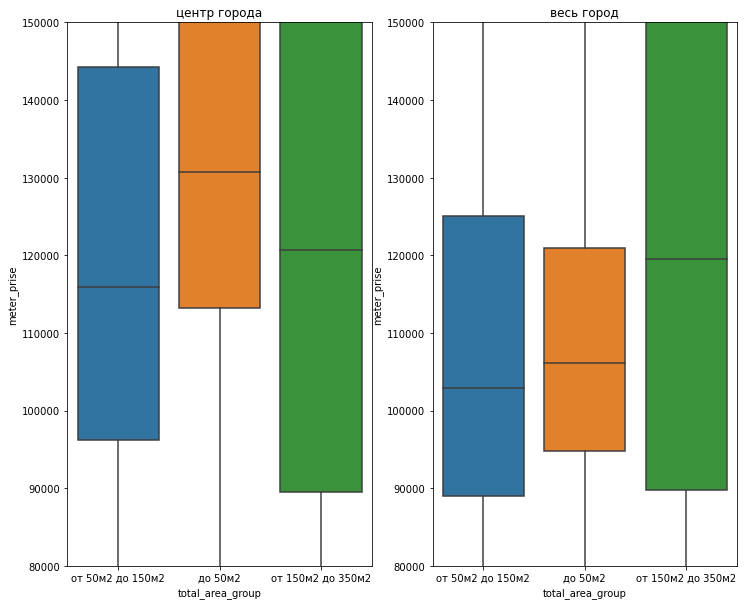

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(12,10))

sns.boxplot(x='total_area_group', y='meter_prise', data=spb_center_pivot_seven,ax=axes[0])
sns.boxplot(x='total_area_group', y='meter_prise', data=spb_center,ax=axes[1]) 
axes[0].set_ylim([80000,150000])
axes[1].set_ylim([80000,150000])
axes[0].title.set_text('центр города')
axes[1].title.set_text('весь город')

- В центре города самые дорогие квартиры имеют площадь до 50м2
- В анализе по городу самую высокую цену за м2 имеют квартиры от 150м2 до 350м2

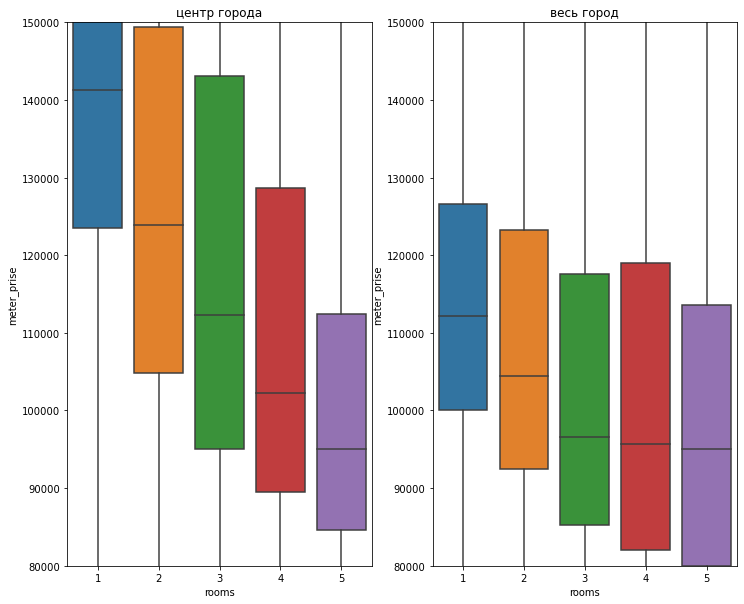

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12,10))

sns.boxplot(x='rooms', y='meter_prise', data=spb_center_pivot_seven,ax=axes[0])
sns.boxplot(x='rooms', y='meter_prise', data=spb_center,ax=axes[1]) 
axes[0].set_ylim([80000,150000])
axes[1].set_ylim([80000,150000])
axes[0].title.set_text('центр города')
axes[1].title.set_text('весь город')

- Показатели по городу и по центру примерно одинаковые: самые высокие цены на квартиры с 1-2 комнатами.

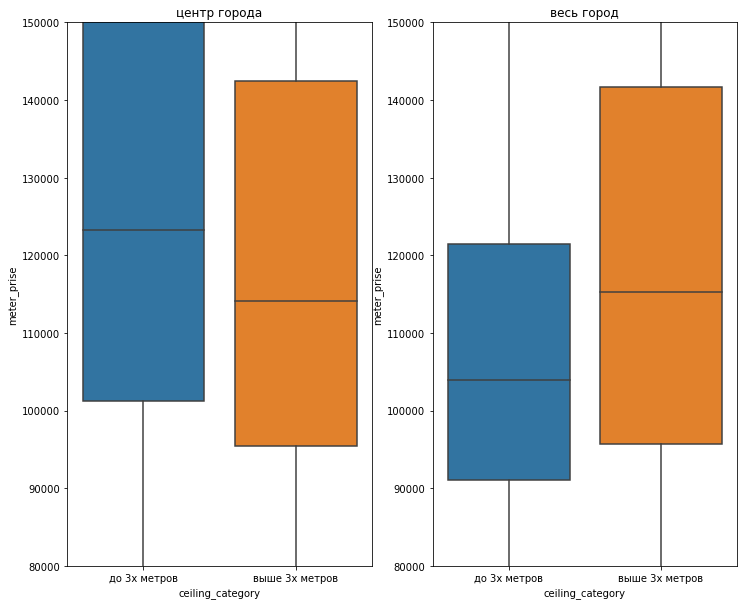

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12,10))

sns.boxplot(x='ceiling_category', y='meter_prise', data=spb_center_pivot_seven,ax=axes[0])
sns.boxplot(x='ceiling_category', y='meter_prise', data=spb_center,ax=axes[1]) 
axes[0].set_ylim([80000,150000])
axes[1].set_ylim([80000,150000])
axes[0].title.set_text('центр города')
axes[1].title.set_text('весь город')

- В центре города квартиры с потолками до 3х метров дороже
- Показатели по городу наобот говорят о повышении средней цены за м2 за квартиры с потолками выше 3х метров

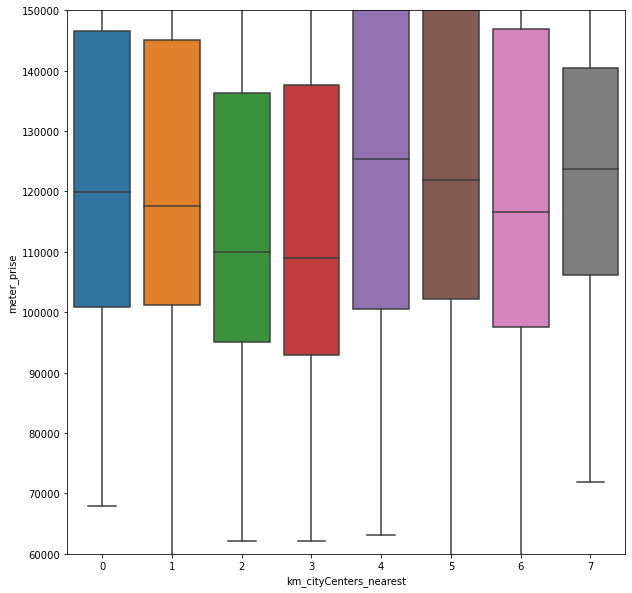

In [86]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x='km_cityCenters_nearest', y='meter_prise', data=spb_center_pivot_seven)
ax.set_ylim([60000,150000])
plt.show()

- Самая высокая цена за м2 наблюдается у квартир, находящихся в 4х километрах от центра города

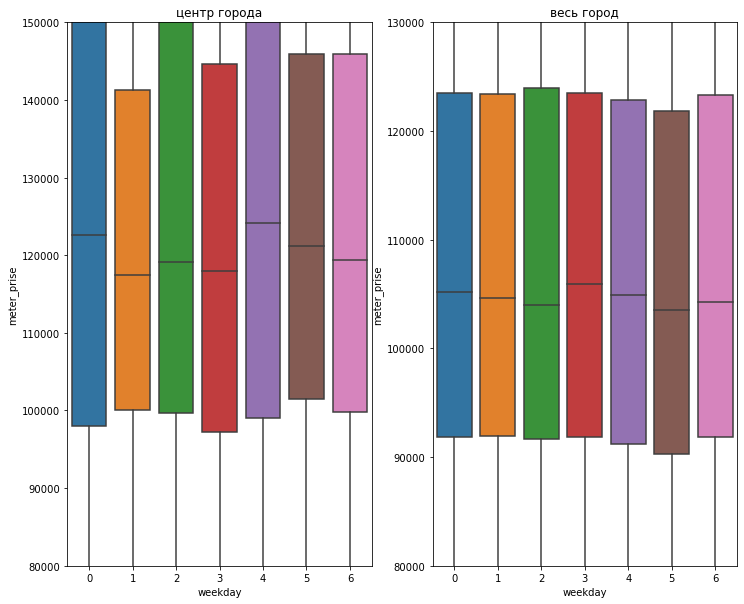

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(12,10))

sns.boxplot(x='weekday', y='meter_prise', data=spb_center_pivot_seven,ax=axes[0])
sns.boxplot(x='weekday', y='meter_prise', data=spb_center,ax=axes[1]) 
axes[0].set_ylim([80000,150000])
axes[1].set_ylim([80000,130000])
axes[0].title.set_text('центр города')
axes[1].title.set_text('весь город')

- Цены на квартиры выше по четвергам и по субботам, я не очень понимаю с чем это связано и имеет ли это какое-то особое значение.

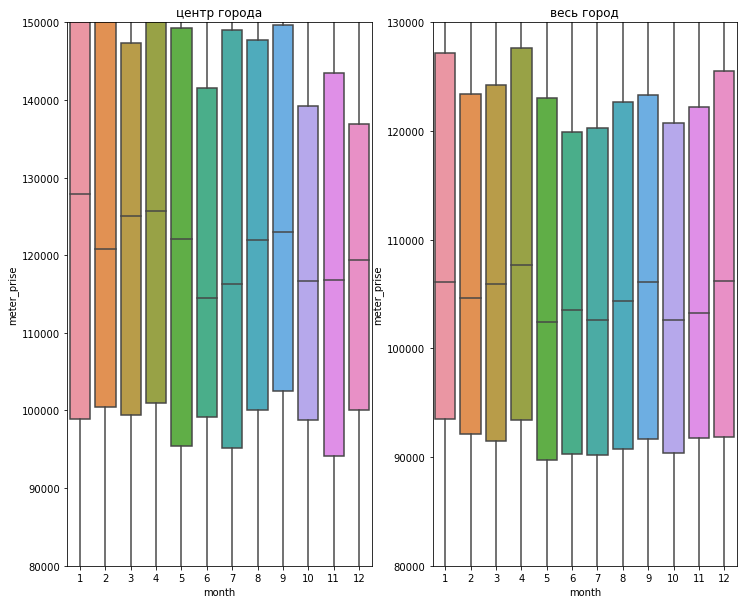

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12,10))

sns.boxplot(x='month', y='meter_prise', data=spb_center_pivot_seven,ax=axes[0])
sns.boxplot(x='month', y='meter_prise', data=spb_center,ax=axes[1]) 
axes[0].set_ylim([80000,150000])
axes[1].set_ylim([80000,130000])
axes[0].title.set_text('центр города')
axes[1].title.set_text('весь город')

- Самые высокие показатели средней цены за м2 в центре города наблюдается в марте, августе и сентябре
- По городу же самый высокий показатель цены за м2 в сентябре

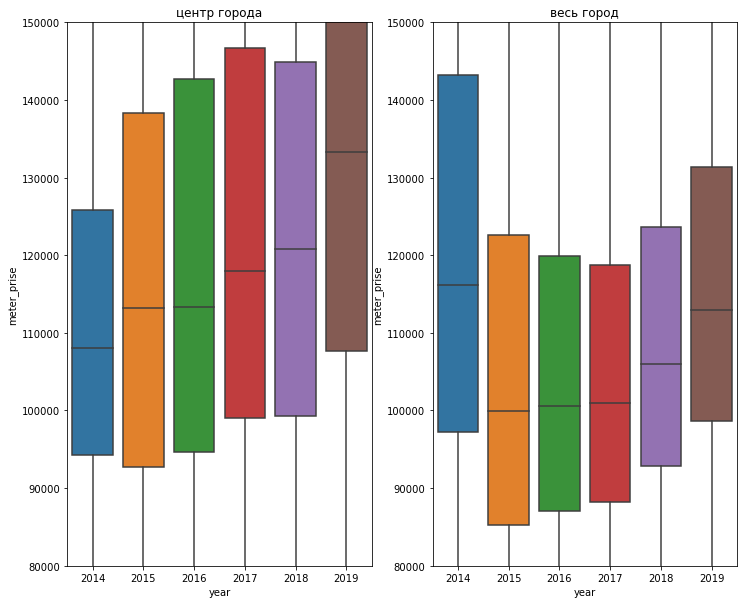

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(12,10))

sns.boxplot(x='year', y='meter_prise', data=spb_center_pivot_seven,ax=axes[0])
sns.boxplot(x='year', y='meter_prise', data=spb_center,ax=axes[1]) 
axes[0].set_ylim([80000,150000])
axes[1].set_ylim([80000,150000])
axes[0].title.set_text('центр города')
axes[1].title.set_text('весь город')

- По ценам за год показатели примерно одиниковые как в центре, так и по всему городу

## Общий вывод

Основные критерии формирования цен на квартиры:

- общая площадь 
- этаж и этажность дома
- высота потолков
- отдаленность от центра
- месяц размещения объявления

Самые высокие цены наблюдаются на квартиры с метражом до 50м2 и имеющих до 3х комнат(самые популярные квартиры стандартных размеров). 

Чем ниже дом, тем ниже цена за квадратный метр, самые низкие цены в домах до 5ти этажей. Квартиры на первых и последних этажах дешевле, чем на остальных, при этом квартиры на первом этаже дешевле всех. 

В самом центре Санкт-Петербурга квартиры с потолками выше 3х метров дешевле, чем квартиры с потолками до 3х метров. Но по общим показателям чем выше потолок, тем дороже квартира. Возможно, такая зависимость от высоты потолков в центре города зависит от старого фонда и его общего состояния. 

Отдаленность от центра всегда уменьшает цену на недвижимость. В центре Санкт-Петербурга квартиры начинают дорожать с отметки 4км от центра. Возможно, это самое оптимальное расстояние от туристического центра для повседневной жизни.

Квартиры, продающиеся в сентябре имеют цену выше чем в другие месяцы. Я думаю, это зависит от повышения спроса в связи с поступлением студентов в университеты. Так же цены высокие в марте и апреле, потому что покупать квартиру лучше весной и летом, так удобнее делать ремонт и переезжать. 
